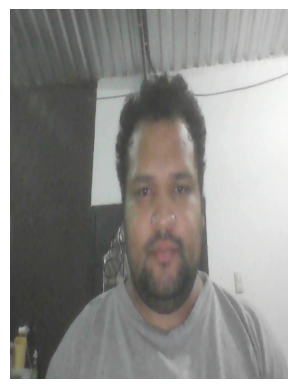

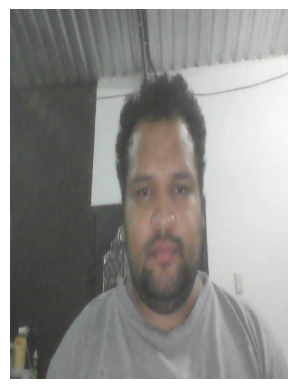

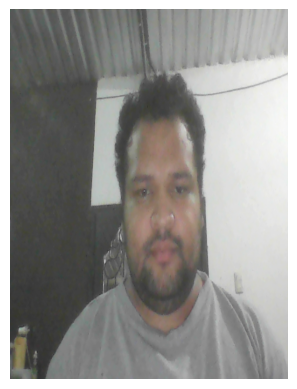

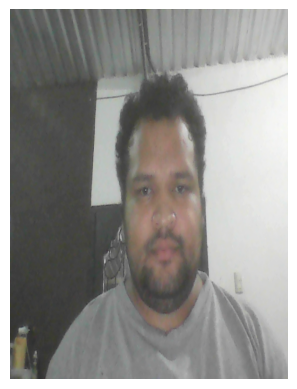

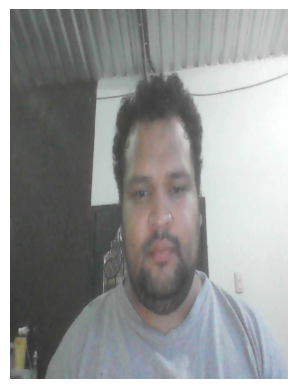

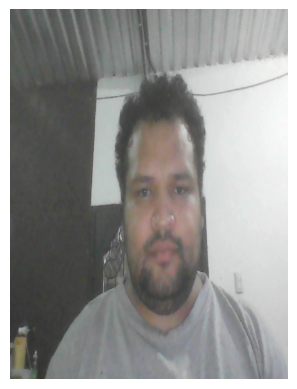

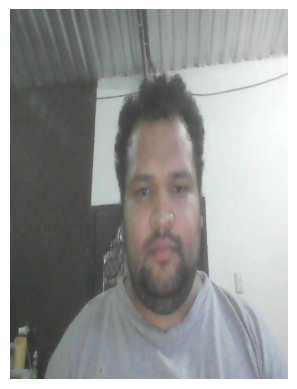

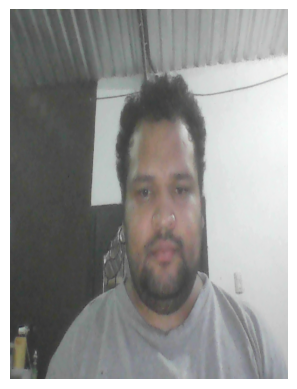

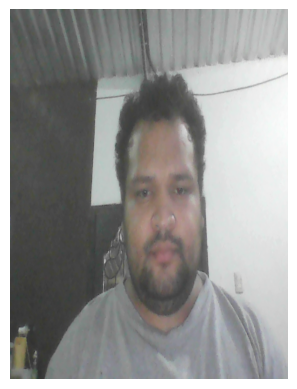

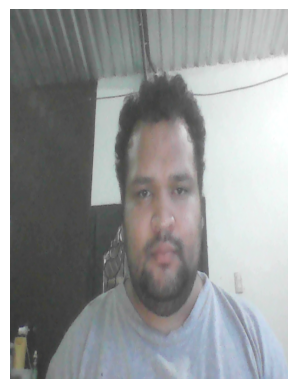

In [1]:
import tkinter as tk
from tkinter import messagebox
import cv2
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import time

# Funcion para capturar y mostrar el video en la interfaz grafica
def mostrar_video():
    # Inicializar la camara
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        messagebox.showerror("Error", "No se pudo abrir la camara")
        return

    # Funcion para actualizar el video en la ventana
    def actualizar_video():
        ret, frame = cap.read()
        if ret:
            # Convertir la imagen de BGR a RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Convertir la imagen a PhotoImage
            img_pil = Image.fromarray(frame_rgb)
            img_tk = ImageTk.PhotoImage(img_pil)

            # Actualizar la imagen en el label
            label_video.config(image=img_tk)
            label_video.image = img_tk

        # Llamar a esta funcion nuevamente despues de 10 ms para seguir mostrando el video
        label_video.after(10, actualizar_video)

    # Iniciar el video en vivo
    actualizar_video()

# Funcion para tomar 10 fotos
def tomar_fotos():
    # Inicializar la camara
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        messagebox.showerror("Error", "No se pudo abrir la camara")
        return

    # Actualizar el texto del contador
    texto_contador.set("Tomando fotos... 0/10")

    # Tomar 10 fotos
    for i in range(1, 11):
        ret, frame = cap.read()

        if ret:
            # Redimensionar la imagen
            frame_resized = cv2.resize(frame, (600, 800))

            # Guardar la imagen
            nombre_archivo = f'captura{i}.jpg'
            cv2.imwrite(nombre_archivo, frame_resized)

            # Convertir la imagen de BGR a RGB
            frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

            # Convertir la imagen a un objeto Image de PIL
            img_pil = Image.fromarray(frame_rgb)

            # Mostrar la imagen en el notebook
            plt.imshow(img_pil)
            plt.axis('off') 
            plt.show()

            # Actualizar el contador de fotos
            texto_contador.set(f"Tomando fotos... {i}/10")

            # Esperar 2 segundos antes de tomar la siguiente foto
            time.sleep(2)

        else:
            messagebox.showerror("Error", f"No se pudo capturar la imagen {i}")
            break

    # Liberar la camara
    cap.release()

    # Mostrar mensaje al finalizar
    messagebox.showinfo("Completado", "Se han tomado todas las fotos.")

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Tomar 10 Fotos y Ver Video")

boton_foto = tk.Button(ventana, text="Tomar 10 Fotos", command=tomar_fotos)
boton_foto.pack(pady=20)

label_video = tk.Label(ventana)
label_video.pack(pady=20)

texto_contador = tk.StringVar()
texto_contador.set("Tomando fotos... 0/10")
label_contador = tk.Label(ventana, textvariable=texto_contador)
label_contador.pack(pady=10)

# Iniciar la captura de video
mostrar_video()

# Ejecutar el bucle de eventos
ventana.mainloop()
